In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [13]:
# Define image dimensions
img_height, img_width = 150, 150  # You can adjust this based on your needs

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.2)  # 20% for validation

train_data_gen = datagen.flow_from_directory(
    'Dataset2/FNA/',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',  # binary classification for benign/malignant
    subset='training'
)

validation_data_gen = datagen.flow_from_directory(
    'Dataset2/FNA/',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',  # binary classification for benign/malignant
    subset='validation'
)


Found 1380 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(
    train_data_gen,
    validation_data=validation_data_gen,
    epochs=5  # Adjust epochs as needed
)


Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.6624 - loss: 1.2733 - val_accuracy: 0.7674 - val_loss: 0.4872
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.8406 - loss: 0.3698 - val_accuracy: 0.7645 - val_loss: 0.5636
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.8954 - loss: 0.3118 - val_accuracy: 0.6453 - val_loss: 0.7849
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - accuracy: 0.9003 - loss: 0.2678 - val_accuracy: 0.6919 - val_loss: 0.6335
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.9090 - loss: 0.2574 - val_accuracy: 0.6599 - val_loss: 0.7615


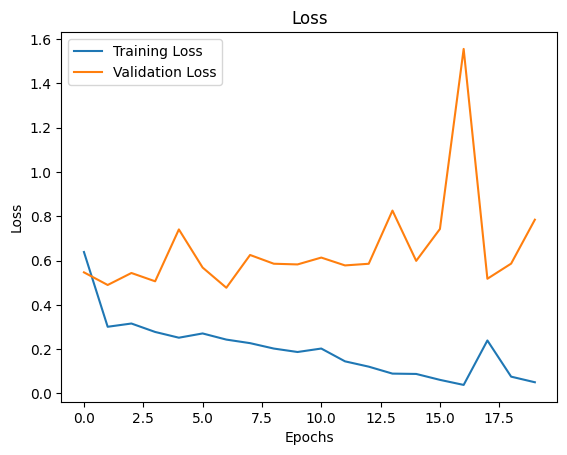

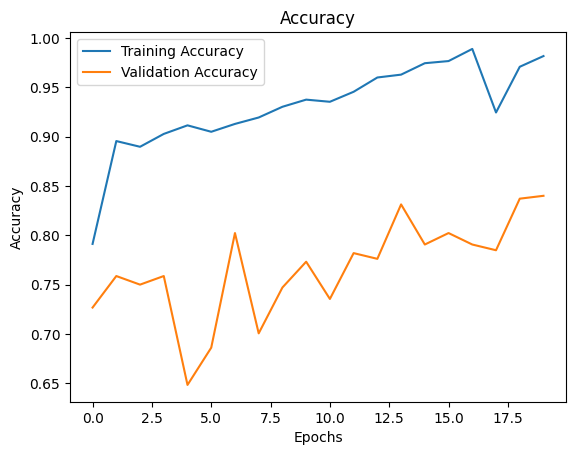

In [6]:
# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
test_dir = 'Dataset2/test'
test_images = []
file_names = []

# Load images and their filenames
for filename in os.listdir(test_dir):
    img_path = os.path.join(test_dir, filename)
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0  # Rescale
    test_images.append(img_array)
    file_names.append(filename)  # Store the filename

test_images = np.array(test_images)

# Make predictions
predictions = model.predict(test_images)
predicted_classes = ['Benign' if pred < 0.5 else 'Malignant' for pred in predictions]

# Print filename with predicted class
for filename, predicted_class in zip(file_names, predicted_classes):
    print(f"File: {filename} - Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
File: three.png - Predicted Class: Malignant
File: one.png - Predicted Class: Benign
File: nine.png - Predicted Class: Malignant
File: four.png - Predicted Class: Malignant
File: seven.png - Predicted Class: Malignant
File: thirteen.png - Predicted Class: Malignant
File: five.png - Predicted Class: Malignant
File: twelve.png - Predicted Class: Malignant
File: fourteen.png - Predicted Class: Malignant
File: two.png - Predicted Class: Benign
File: eight.png - Predicted Class: Malignant
File: six.png - Predicted Class: Benign
File: ten.png - Predicted Class: Malignant
File: eleven.png - Predicted Class: Malignant
